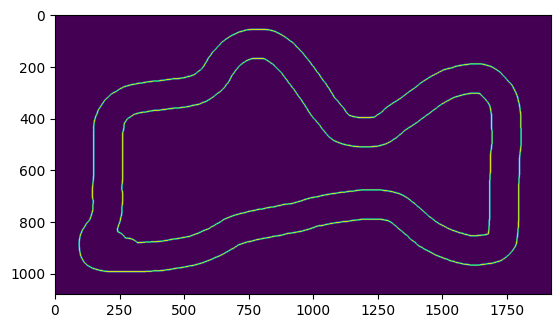

In [24]:

import cv2
import matplotlib.pyplot as plt
import numpy as np

image_path = "track.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
contours, _ = cv2.findContours(image.astype('uint8'), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

zimage = np.zeros_like(image)
image_contours = cv2.drawContours(zimage, contours, -1, (255, 255, 0), 3)


image = image.astype(int) * 255
plt.imshow(image_contours)



In [28]:
from pygame.math import Vector2

def _segment_intersection( p1, p2, p3, p4):
    # Function to find the intersection point of two line segments
    # Implemented by ChatGPT
    def _ccw(A, B, C):
        return (C.y-A.y) * (B.x-A.x) > (B.y-A.y) * (C.x-A.x)

    def _intersect(A, B, C, D):
        return _ccw(A,C,D) != _ccw(B,C,D) and _ccw(A,B,C) != _ccw(A,B,D)

    if _intersect(p1, p2, p3, p4):
        # Calculate the intersection point
        a1 = p2.y - p1.y
        b1 = p1.x - p2.x
        c1 = a1 * p1.x + b1 * p1.y
        
        a2 = p4.y - p3.y
        b2 = p3.x - p4.x
        c2 = a2 * p3.x + b2 * p3.y
        
        det = a1 * b2 - a2 * b1
        
        if det == 0:
            return None  # Parallel lines
        else:
            x = (b2 * c1 - b1 * c2) / det
            y = (a1 * c2 - a2 * c1) / det
            return Vector2(x, y)
    else:
        return None  # No intersection

# Define a test case
p1 = Vector2(0, 0)
p2 = Vector2(5, 5)
p3 = Vector2(0, 5)
p4 = Vector2(5, 0)

# Expected intersection point
expected_intersection = Vector2(2.5, 2.5)

# Validate the function
intersection_point = _segment_intersection(p1, p2, p3, p4)

# Check if the calculated intersection point matches the expected one
if intersection_point == expected_intersection:
    print("Intersection point calculated correctly:", intersection_point)

Test Passed: Intersection point is correct
